In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from single_photons.environment import Particle

In [6]:
omega = 2*np.pi*1e5
T = 2*np.pi/omega
t = np.arange(0, 1000*T, T/400)
N = t.shape[0]
delta_t = np.diff(t)[0]

In [7]:
gamma = 85000
coupling = 1
eta_detec=0.9
env = Particle(omega, gamma, coupling, eta_detection=eta_detec)

In [15]:
std_detection = 1

In [16]:
states = np.array([[1],[0.]])
new_states = np.zeros((N,2)) 
measured_states = np.zeros((N, 2))
for i in tqdm(range(t.shape[0])):
    new_states[i,:] = states[:,0]
    measured_states[i, :] = states[:, 0] + std_detection*np.random.normal()
    states = env.step(states, control=0, delta_t=delta_t)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400000/400000 [00:14<00:00, 28401.58it/s]


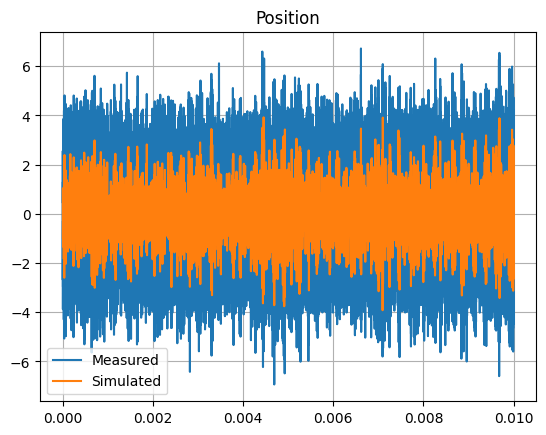

In [17]:
fig = plt.Figure()
plt.title('Position')
plt.plot(t, measured_states[:,0])
plt.plot(t, new_states[:,0])
plt.grid()
plt.legend(['Measured', 'Simulated'])
plt.show()

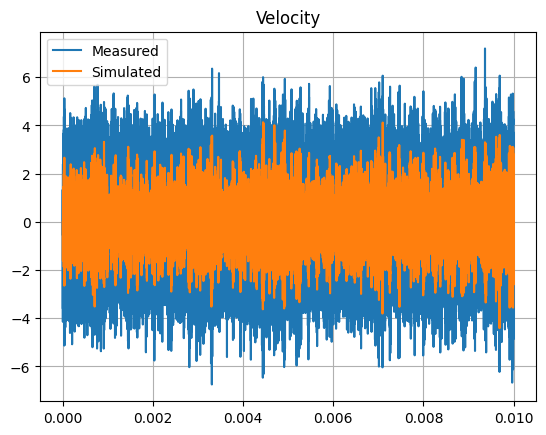

In [18]:
fig = plt.Figure()
plt.title('Velocity')
plt.plot(t, measured_states[:,1])
plt.plot(t, new_states[:,1])
plt.grid()
plt.legend(['Measured', 'Simulated'])
plt.show()